In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [96]:
house_df = pd.read_excel('house_data.xlsx') # Importing csv file into pandas data frame

In [97]:
house_df_copy = copy.deepcopy(house_df)

In [98]:
# Taking a look at the data
house_df.head()

,Year,Median,Average,# Sold,Interest,GDP ( Billions of US $),Per Capita (US $),GDP Growth (%),UNEMPLOYMENT RATE (DECEMBER),"INFLATION (DECEMBER, YOY)",Population,"M2, Billions of Dollars, Monthly, Seasonally Adjusted"
0,1971,25200,28300,656,7.541750,1164.850,5609.3826,3.2934,0.060,-1.55,202907917,710.3
1,1972,27600,30500,718,7.383269,1279.110,6094.0180,5.2589,0.052,-1.02,205238390,802.3
2,1973,32500,35500,634,8.044808,1425.376,6726.3590,5.6457,0.049,2.91,207314764,855.5
3,1974,35900,38900,519,9.187115,1545.243,7225.6914,-0.5406,0.072,4.88,209277968,902.1
4,1975,39300,42600,549,9.047115,1684.904,7801.4567,-0.2055,0.082,-1.91,211274535,1016.2


In [99]:
# Checking to see the variables which are most correlated
house_df.corr()

,Year,Median,Average,# Sold,Interest,GDP ( Billions of US $),Per Capita (US $),GDP Growth (%),UNEMPLOYMENT RATE (DECEMBER),"INFLATION (DECEMBER, YOY)",Population,"M2, Billions of Dollars, Monthly, Seasonally Adjusted"
Year,1.000000,0.980340,0.982707,0.020483,-0.777205,0.984630,0.994425,-0.242404,-0.298264,0.049912,0.998541,0.913316
Median,0.980340,1.000000,0.998743,0.054260,-0.785561,0.993374,0.992834,-0.211206,-0.362725,0.099461,0.978922,0.958002
Average,0.982707,0.998743,1.000000,0.065334,-0.781174,0.991584,0.993438,-0.216093,-0.358015,0.091899,0.981798,0.945799
# Sold,0.020483,0.054260,0.065334,1.000000,-0.098418,-0.006199,0.017761,0.345883,-0.577033,0.133086,0.025477,-0.059022
Interest,-0.777205,-0.785561,-0.781174,-0.098418,1.000000,-0.807386,-0.795079,0.116391,0.409921,-0.174139,-0.795610,-0.762162
GDP ( Billions of US $),0.984630,0.993374,0.991584,-0.006199,-0.807386,1.000000,0.996906,-0.237267,-0.318313,0.080199,0.986116,0.960712
Per Capita (US $),0.994425,0.992834,0.993438,0.017761,-0.795079,0.996906,1.000000,-0.231419,-0.322976,0.072005,0.994512,0.942347
GDP Growth (%),-0.242404,-0.211206,-0.216093,0.345883,0.116391,-0.237267,-0.231419,1.000000,-0.456649,0.216466,-0.246654,-0.227568
UNEMPLOYMENT RATE (DECEMBER),-0.298264,-0.362725,-0.358015,-0.577033,0.409921,-0.318313,-0.322976,-0.456649,1.000000,-0.408175,-0.299873,-0.294275
"INFLATION (DECEMBER, YOY)",0.049912,0.099461,0.091899,0.133086,-0.174139,0.080199,0.072005,0.216466,-0.408175,1.000000,0.050178,0.112399


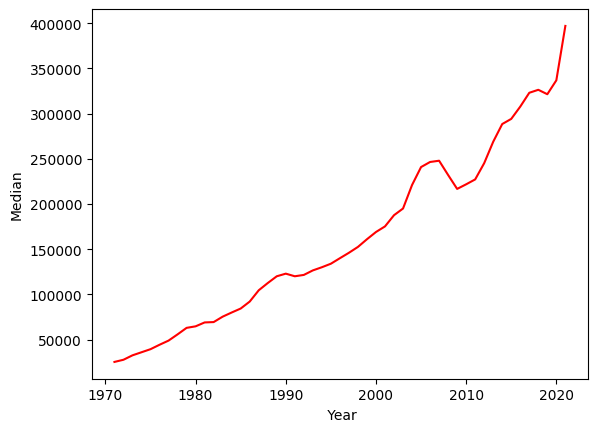

In [100]:
plt.plot(house_df_copy[' Year'],house_df_copy['Median'], color='red')
plt.xlabel(' Year')
plt.ylabel('Median')
plt.show()

In [101]:
house_df.columns.tolist() # The column names have some spaces. e.g ' Year'

[' Year',
 'Median',
 'Average',
 '# Sold',
 'Interest',
 ' GDP ( Billions of US $)',
 ' Per Capita (US $)',
 'GDP Growth (%)',
 'UNEMPLOYMENT RATE (DECEMBER)',
 'INFLATION (DECEMBER, YOY)',
 'Population',
 'M2, Billions of Dollars, Monthly, Seasonally Adjusted']

In [102]:
house_df.columns = [col.strip() for col in house_df.columns] # Removing spaces in column names
house_df_copy.columns = [col.strip() for col in house_df_copy.columns] # Removing spaces in column names

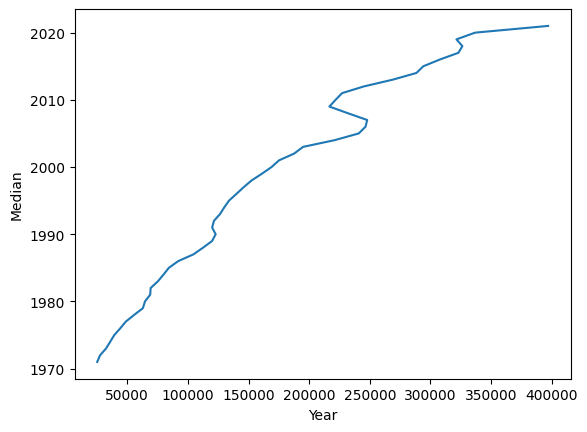

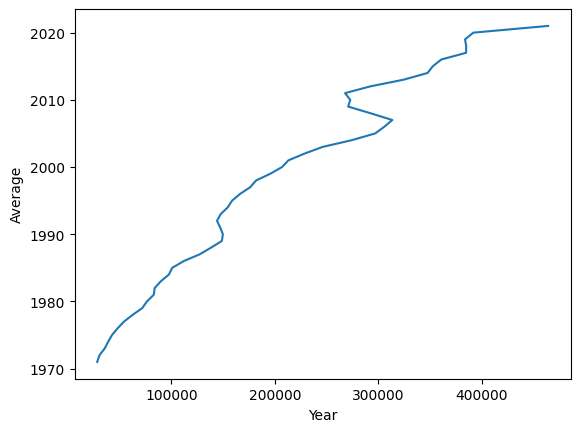

In [103]:
# Average and Median seem very correlated, which statistically make sense.
# Let's plot that to check
for variable in ['Median','Average']:
  plt.plot(house_df[variable], house_df['Year'])
  plt.ylabel(variable)
  plt.xlabel("Year")
  plt.show()

In [104]:
# Since the median and average are almost identical,
# we can drop the average column, because the median is a 
# better measure of the mid point of a distribution
house_df = house_df.drop('Average', axis = 1)

**Now let's check if other variables vary with each other using a pairplot.**

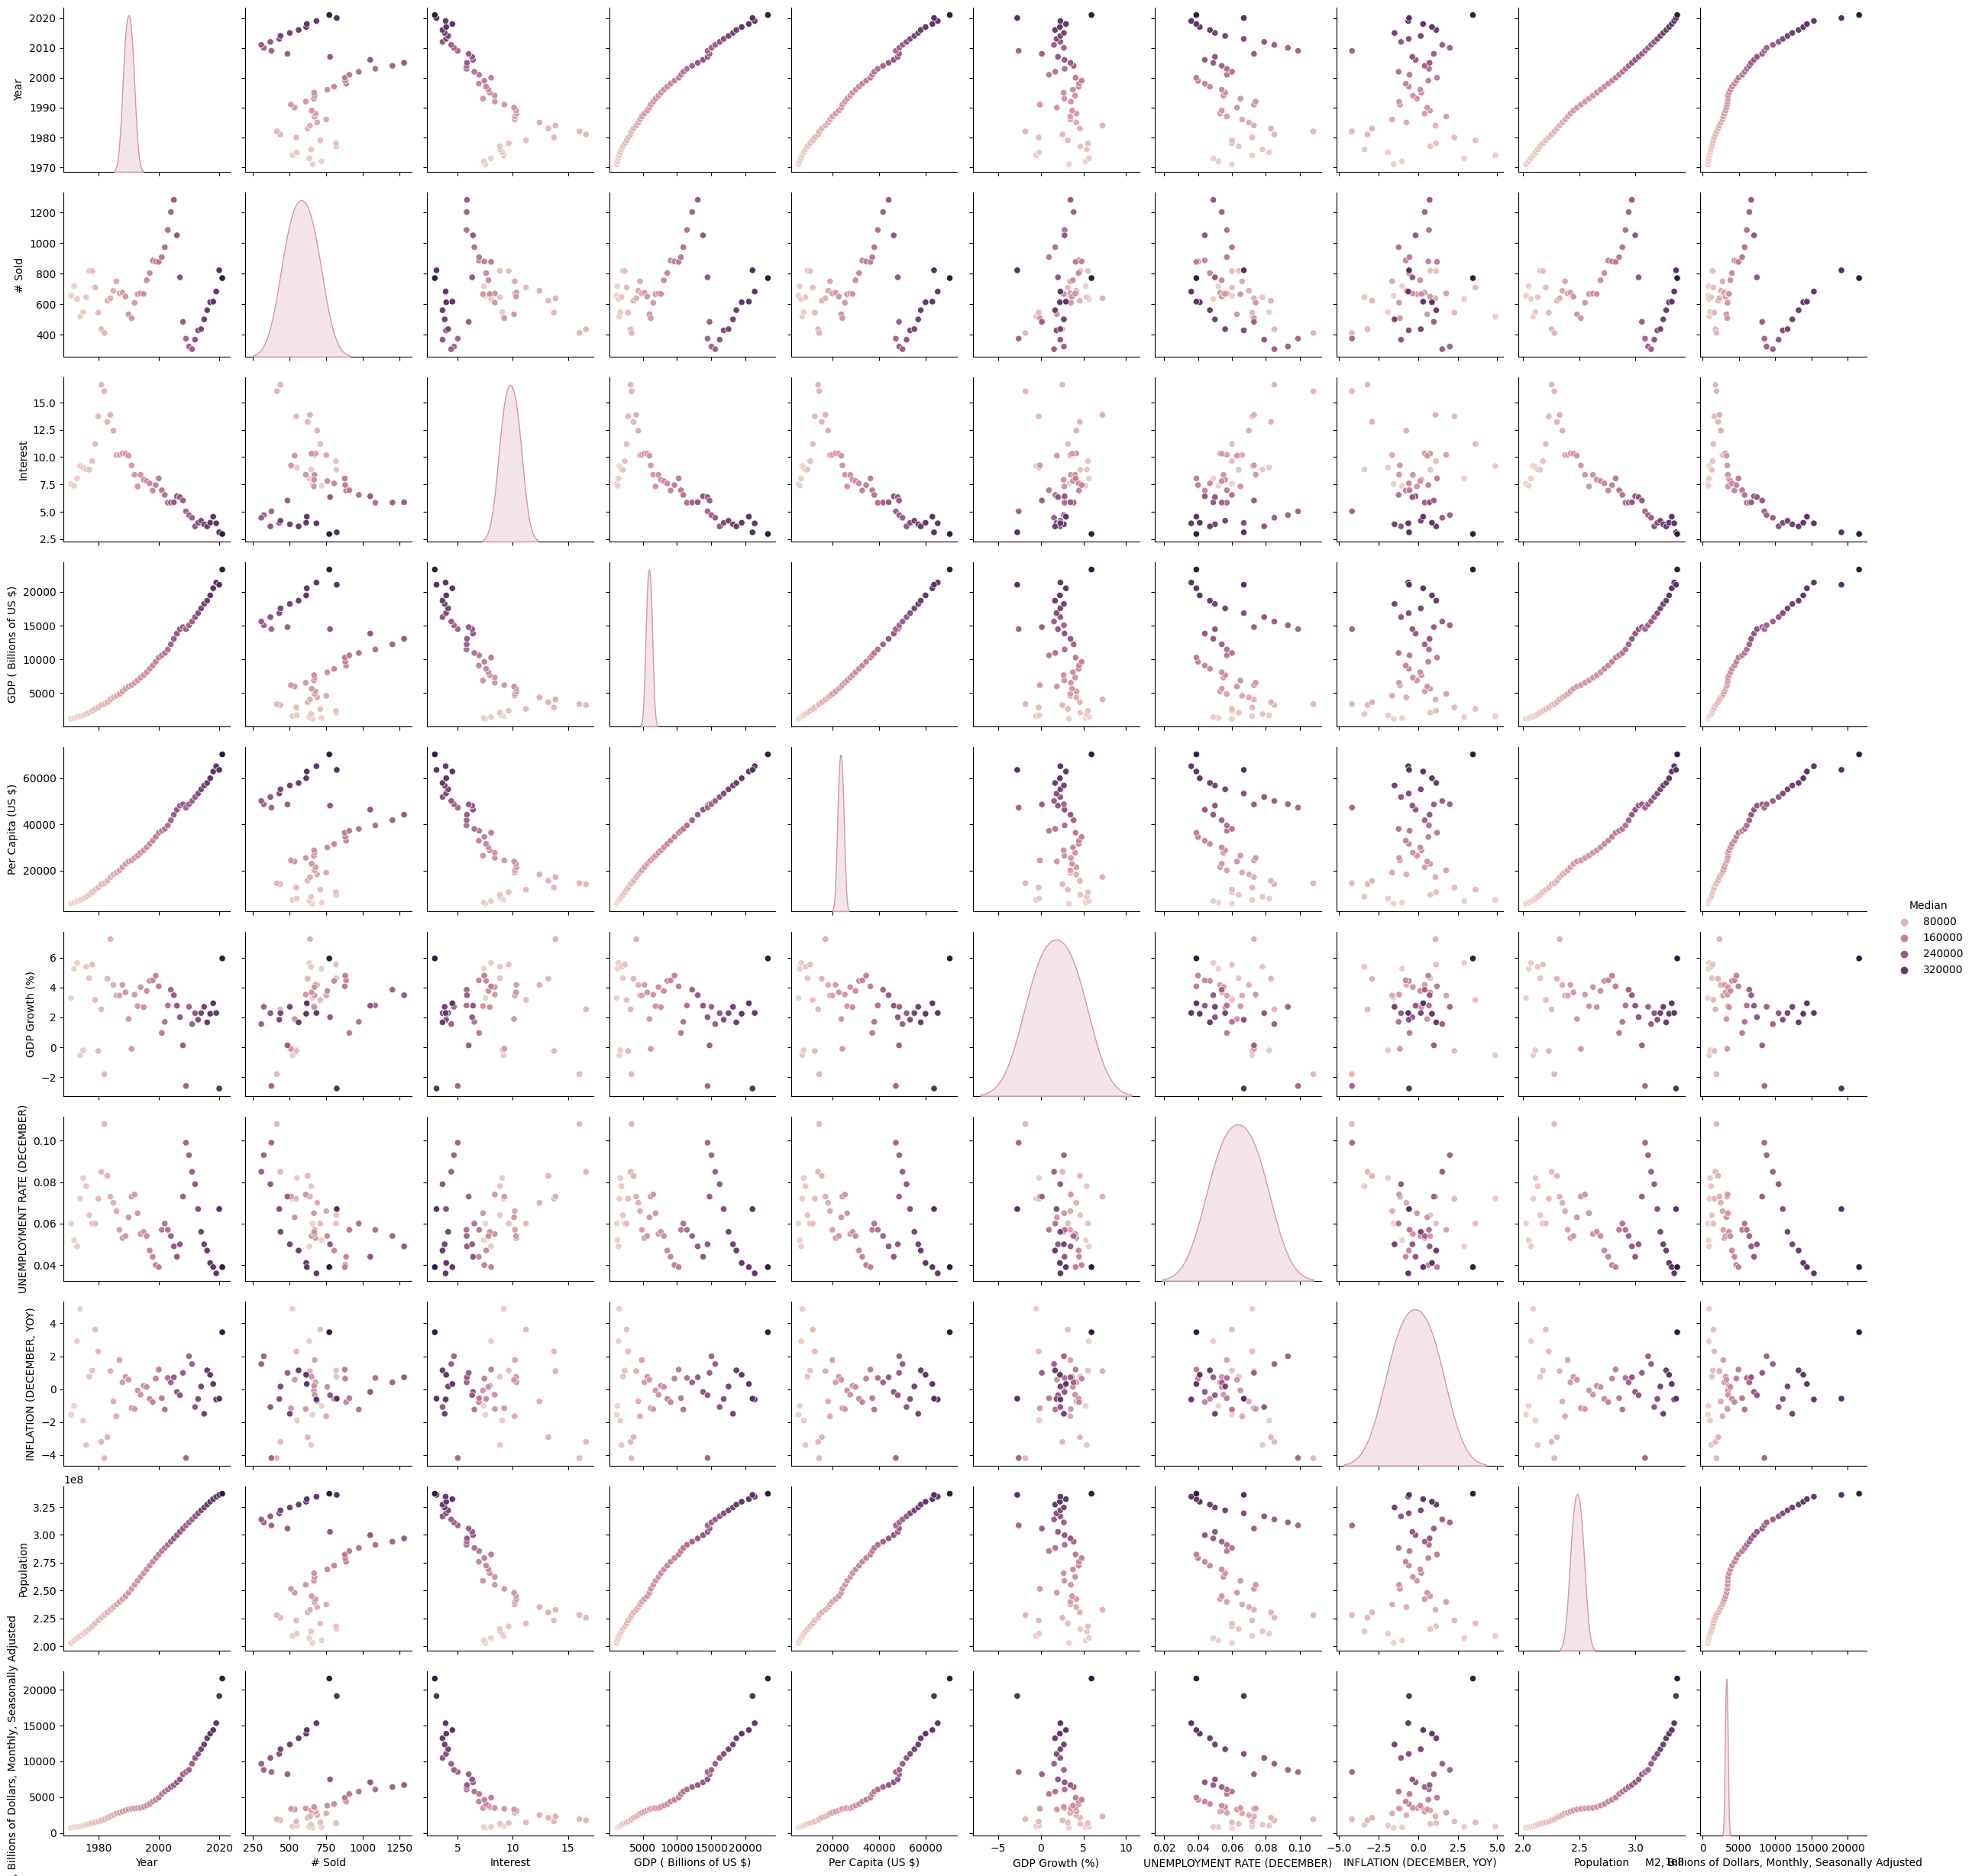

In [ ]:
sns.pairplot(house_df, hue="Median")

**The pairplot shows that Money Supply, population, GDP, and per capita vary together. So one might even think that eliminating one of them, population for example, will not signficantly change the results. However, if you do that, there will be a huge difference in the outcome. As for other variables, there do not seem to be a clear covariance, if not for the interest rate which negative correlate with GDP, Population, Money Supply, and Per Capita**

***Findingthe top variables correlated to Median house Price***

In [105]:
median_correlations = house_df.corrwith(house_df['Median'])
corr_series = median_correlations.abs().nlargest(6)[1:]
print('Most influencing factors median price of houses in the US:')
top_variables = corr_series.index.tolist()
for index in corr_series.index:
  print(f'{index}: {round(median_correlations.loc[index],2)}')


Most influencing factors median price of houses in the US:
GDP ( Billions of US $): 0.99
Per Capita (US $): 0.99
Year: 0.98
Population: 0.98
M2, Billions of Dollars, Monthly, Seasonally Adjusted: 0.96


In [106]:
split_index = int(len(house_df) * 0.9)
ytrain, ytrue = house_df[:split_index]['Median'], house_df[split_index:]['Median']

In [107]:
## Normalizing the DATA
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(house_df)

# Transform the data to normalize all the columns
normalized_df = scaler.transform(house_df)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_df, columns=house_df.columns)

In [108]:
xtrain, xtest = normalized_df[:split_index].drop('Median', axis=1), normalized_df[split_index:].drop('Median', axis=1)



***Doing Linear Regression on each of the most correlated variable***

In [127]:
lr_coefs = []
for variable in top_variables:
  lr_coefs.append(np.polyfit(xtrain.loc[:, variable], ytrain, 1))

In [114]:
ranges = list(map(lambda column: normalized_df[column].max() - normalized_df[column].min(), top_variables)) # ranges of different variables
min_maxes = list(map(lambda column: (normalized_df[column].min(), normalized_df[column].max()), top_variables)) # (min, max) tuple of different variables

In [115]:
potential_variable_values = [np.linspace(min_maxes[i][0] - 0.2 * ranges[i], min_maxes[i][1] + 0.2 * ranges[i],1000) for i in range(len(ranges))]
predicted_values = [lr_coefs[i][0] * potential_variable_values[i] + lr_coefs[i][1] for i in range(len(top_variables))]

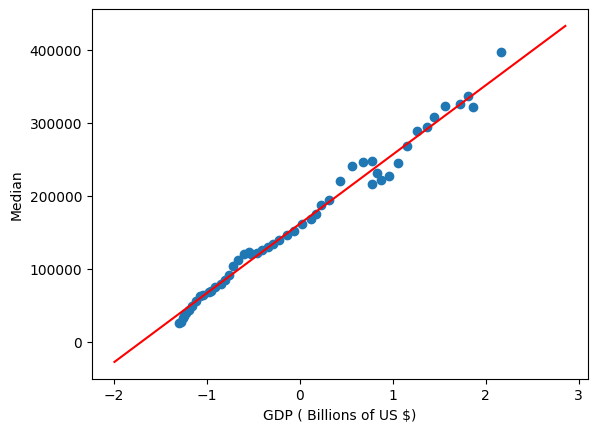

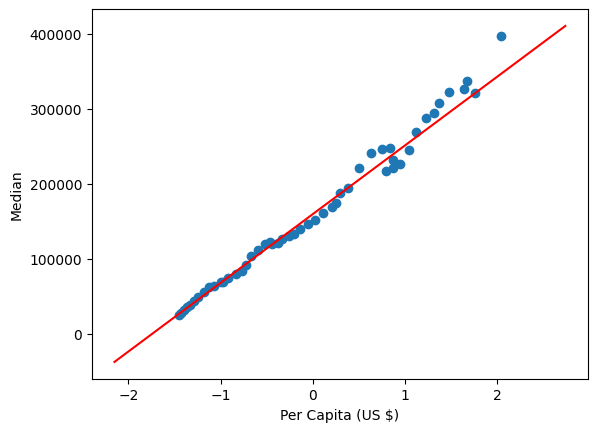

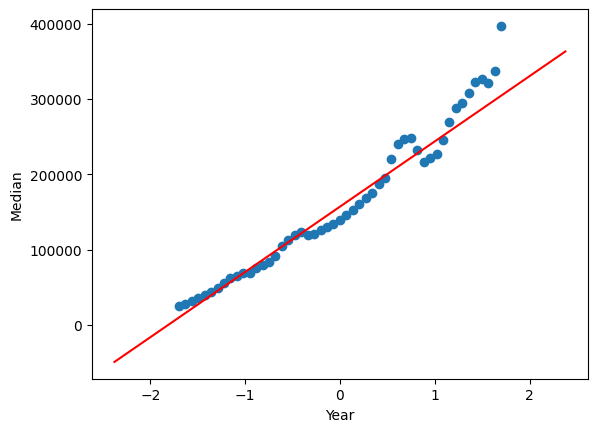

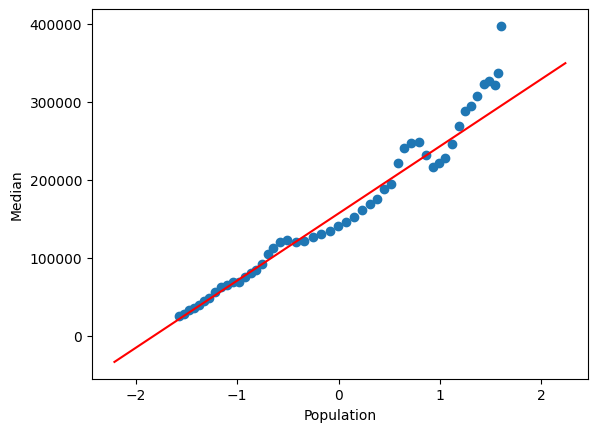

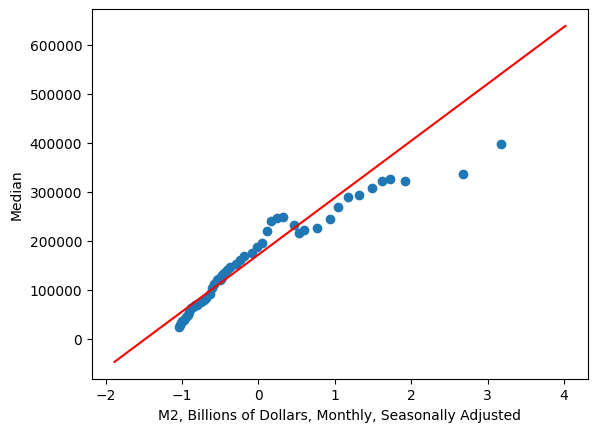

In [117]:
# Plotting the data points along with the regression lines for each variable
for index, variable in enumerate(top_variables):
    #plt.scatter(house_df_copy[variable],house_df_copy['Median'])
    plt.scatter(normalized_df[variable],house_df_copy['Median'])
    plt.plot(potential_variable_values[index], predicted_values[index], color='red')
    plt.xlabel(variable)
    plt.ylabel('Median')
    plt.show()

***The fits above look good, especially for Per Capita. Now let's formally evaluate each regression using RMSE***

In [118]:
# Test predictions
test_predictions = [lr_coefs[i][0] * xtest[top_variables[i]] + lr_coefs[i][1] for i in range(len(top_variables))]

In [119]:
# Mean Squared Errors
MSE = [mean_squared_error(ytrue, test_predictions[i]) for i in range(len(top_variables))]


In [120]:
for i, variable in enumerate(top_variables):
  print(variable, ": ", round(math.sqrt(MSE[i]),-3))


GDP ( Billions of US $) :  15000.0
Per Capita (US $) :  28000.0
Year :  51000.0
Population :  55000.0
M2, Billions of Dollars, Monthly, Seasonally Adjusted :  93000.0


***Note that, even though GDP, Per Capita,Population, and Year have an almost perfect correlation with Median House Price, their RMSE differ quite a lot, meaning that correlation is not necessarily the best way to determine whether a variable is really good or not.***

**Given that RMSE may seem elusive, here are the test predictions followed by the true values**

In [121]:
ytrue

45    307800
46    323100
47    326400
48    321500
49    336900
50    397100
Name: Median, dtype: int64

In [122]:
test_predictions

[45    298614.242900
 46    310232.173884
 47    325912.163499
 48    338505.794840
 49    333745.562644
 50    367231.892320
 Name: GDP ( Billions of US $), dtype: float64,
 45    285461.102940
 46    295565.363635
 47    309999.167224
 48    321371.162234
 49    313500.859624
 50    346759.098358
 Name: Per Capita (US $), dtype: float64,
 45    274865.151515
 46    280752.621871
 47    286640.092227
 48    292527.562582
 49    298415.032938
 50    304302.503294
 Name: Year, dtype: float64,
 45    274642.767049
 46    279909.686121
 47    284702.717098
 48    289150.531552
 49    292461.101914
 50    294615.227948
 Name: Population, dtype: float64,
 45    344747.932277
 46    359893.016444
 47    371755.294935
 48    394267.305224
 49    483405.936364
 50    540656.469422
 Name: M2, Billions of Dollars, Monthly, Seasonally Adjusted, dtype: float64]

**Now let's do the regression with all the variable at once and see whether it improves our result.**

In [128]:
model = LinearRegression()

In [129]:
model.fit(xtrain,ytrain)

LinearRegression()

In [130]:
test_predictions_multi = model.predict(xtest)

In [131]:
# Root Mean Squared Error when using all variables
RMSE_multi = mean_squared_error(ytrue, test_predictions_multi)
print("RMSE with all variables combined: ", round(math.sqrt(RMSE_multi),-3))

RMSE with all variables combined:  28000.0


***Linear Regression using all the variables gaves us a result worse than using the GDP alone.***

In [135]:
model_2 = LinearRegression()
model_2.fit(xtrain[top_variables], ytrain)
test_predictions_top = model_2.predict(xtest[top_variables])
RMSE_top = mean_squared_error(ytrue, test_predictions_top)
print("RMSE with top variables combined: ", round(math.sqrt(RMSE_multi),-3))

RMSE with top variables combined:  28000.0


***Linear Regression with top variables gives the same result as above, still worse than GDP, but showing that we don't even need all the variables***

In [139]:
# create a Ridge regression object and fit the training data
ridge_reg = Ridge(alpha=0.37)
ridge_reg.fit(xtrain[top_variables], ytrain)

Ridge(alpha=0.37)

In [140]:
# make predictions on the test data
ridge_pred = ridge_reg.predict(xtest[top_variables])

In [141]:
# evaluate the performance of the models
ridge_mse = mean_squared_error(ytrue, ridge_pred)
print('Root Mean square error when using Ridge regression: ', round(math.sqrt(ridge_mse), -3))

Root Mean square error when using Ridge regression:  20000.0


In [152]:
# Get the coefficient weights of the model
weights_ridge = ridge_reg.coef_

# Print the coefficient weights for each variable
for i in range(len(weights_ridge)):
    print(top_variables[i], ':', round(weights_ridge[i],-3))

GDP ( Billions of US $) : 29000.0
Per Capita (US $) : 39000.0
Year : 13000.0
Population : 4000.0
M2, Billions of Dollars, Monthly, Seasonally Adjusted : 8000.0


**Per Capita seems to contributing more to the output of the model than the other features**

***L2 normalization(ridge regression) improving the test accuracy. It minimizes overfitting, reason why it gives a better result(though still worse than GDP alone!).
Interesting enough, when doing the Ridge Regression with all the variables it gives the worst result.***

***This modeling shows that we can accurately predict median prices of houses given data within $20000 of precision***

In [145]:
# Create a decision tree regressor object
dt_reg = DecisionTreeRegressor()

# Train the model on the training data
dt_reg.fit(xtrain[top_variables], ytrain)

# Use the trained model to make predictions on the test data
ypred_dt = dt_reg.predict(xtest[top_variables])

In [147]:
# Calculate the mean squared error between the predicted and true target values
mse_dt = mean_squared_error(ypred_dt, ytrue)

# Print the MSE
print('RMSE:', round(math.sqrt(mse_dt), -3))

RMSE: 50000.0


**Decision Tree performs poorly. It is about 3 times worse than the Ridge Regression**

In [150]:
# Create a Lasso object with alpha=0.1
lasso_reg = Lasso(alpha=0.1)

# Train the model on the training data
lasso_reg.fit(xtrain[top_variables], ytrain)

# Use the trained model to make predictions on the test data
ypred_lasso = lasso_reg.predict(xtest[top_variables])

# Get the coefficient weights of the model
weights = lasso_reg.coef_

# Print the coefficient weights for each variable
for i in range(len(weights)):
    print(top_variables[i], ':', round(weights[i],-3))


GDP ( Billions of US $) : 73000.0
Per Capita (US $) : 142000.0
Year : 51000.0
Population : -144000.0
M2, Billions of Dollars, Monthly, Seasonally Adjusted : -30000.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+09, tolerance: 2.715e+07
  model = cd_fast.enet_coordinate_descent(


In [151]:
# Calculate the mean squared error between the predicted and true target values
mse_lasso = mean_squared_error(ypred_lasso, ytrue)

# Print the MSE
print('RMSE:', round(math.sqrt(mse_lasso), -3))

RMSE: 23000.0


**The Lasso performs a little worse than the Ridge Regression, but it is worth noticing the weights of the Per Capita variable and Population features are twice that of the GDP in magnitude, whereas when doing the the linear regression with each feature individually, the GDP gives better results**

**In Conclusion, we have seen that though GDP alone could give results with an RMSE value of 15000 dollars, combining many features does not always gives the best results in modelling. Furthermore, depending on the model, different features are given more weights. This sheds some light of WDM by highlighting how even for simple linear regressions models, our algorithms can pick strange features to be important. 
With respect to our housing problem, we can confidently say that we can predict the price of houses within 20,000 dollars of accuracy. It may seem big, but that's within 7% of house prices nowadays.***